In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


In [2]:
path = "C:/Users/Karina/Documents/Karina/CIC/Tesis/Resultados/Resultados_FacesGAN/Experimento 4/"
dbfile = open(path + 'LatentVec_attributes.pkl', 'rb')      
data = pickle.load(dbfile) 
dbfile.close() 

In [3]:
# Load model trained Generator
model = tf.keras.models.load_model('C:/Users/Karina/Documents/Karina/CIC/Tesis/Resultados/Resultados_FacesGAN/Experimento 4/Generator_model_v1_380.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
# average list of latent space vectors
def average_points(points,ix):
    vectors = points[ix]
    # average the vectors
    avg_vector = np.mean(vectors, axis=0)
    return avg_vector

In [77]:
def plot_mean_latent_points(meanVector,model,clases):  
    x = model.predict(meanVector)
    x = (x + 1) / 2.0
    fig = plt.figure(figsize=(10,10))
    for i in range(14):
        plt.subplot(2 ,7 ,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x[i,:,:])
        plt.xlabel(clases[i])
    plt.show()

In [6]:
def plot_generated(examples,n):
    fig = plt.figure(figsize=(10,10))
    for i in range(n * n):
        plt.subplot(n ,n , i+1)
        plt.axis('off')
        plt.imshow(examples[i,:,:])
    plt.show()

In [7]:
def plot_single_latent_point(point,model,text):
    point = np.reshape(point, (1, 100)) 
    x = model.predict(point)
    x = (x + 1) / 2.0
    x = np.reshape(x, (64, 64,3)) 
    fig = plt.figure(figsize=(2,2))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x)
    plt.xlabel(text)
    plt.show()

In [8]:
def plot_gaussian_single_point(point,model,text):
    point = np.reshape(point, (1, 100))
    noise = np.random.randn(100 * 1)
    noise = np.reshape(noise, (1, 100))
    pnoise = noise + point
    x = model.predict(pnoise)
    x = (x + 1) / 2.0
    x = np.reshape(x, (64, 64,3)) 
    fig = plt.figure(figsize=(2,2))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x)
    plt.xlabel(text)
    plt.show()

In [9]:
def plot_gaussian_points(point,model,text,n_images):
    point = np.reshape(point, (1, 100))
    noise = np.random.randn(100 * n_images)
    noise = noise.reshape(n_images, 100)
    pnoise = noise + point
    x = model.predict(pnoise)
    x = (x + 1) / 2.0
    fig = plt.figure(figsize=(10,10))
    for i in range(n_images):
        plt.subplot(1 ,n_images,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x[i,:,:])
        plt.xlabel(text + ' {}'.format(i+1))
    plt.show()

In [10]:
data.keys()

dict_keys(['Latent_points', 'Attributes_binary', 'Attributes'])

In [22]:
dfClass = pd.DataFrame.from_dict(data['Attributes'])
dfClass.columns = ['Male', 'Young','Eyeglasses','Mustache','Bald','Brown_Hair','Black_Hair','Blond_Hair','Gray_Hair']
dfClass

,Male,Young,Eyeglasses,Mustache,Bald,Brown_Hair,Black_Hair,Blond_Hair,Gray_Hair
0,0.003325,0.943656,0.000086,0.001501,8.404452e-07,7.015464e-01,5.994321e-01,1.510985e-06,5.361375e-06
1,1.000000,0.000621,0.351917,0.980755,5.144343e-01,7.915540e-05,2.195502e-04,3.452329e-06,5.154195e-01
2,0.999780,0.872514,1.000000,0.522475,2.062482e-05,4.853792e-01,9.262621e-01,8.328161e-07,8.277111e-06
3,0.999782,0.183766,0.004111,0.035199,6.665982e-06,1.714316e-02,9.724123e-01,5.982810e-06,1.267211e-02
4,0.999995,0.771462,0.000017,0.009447,6.148603e-04,1.074045e-01,9.722012e-01,1.517389e-07,2.735798e-06
...,...,...,...,...,...,...,...,...,...
66,1.000000,0.007638,0.015211,0.604129,5.600443e-01,1.777226e-03,6.733452e-02,1.928831e-05,2.316233e-01
67,0.999734,0.263713,1.000000,0.040574,2.453834e-02,1.611171e-02,5.592790e-01,4.838535e-05,1.063447e-01
68,0.999999,0.158014,0.999597,0.303560,8.194817e-01,6.446710e-03,3.645532e-03,3.070447e-04,1.219333e-01
69,0.510525,0.607614,0.000267,0.000260,1.416806e-07,9.984769e-01,5.817583e-07,1.531500e-04,2.732236e-07


In [12]:
df = pd.DataFrame.from_dict(data['Attributes_binary'])
df.columns = ['Male', 'Young','Eyeglasses','Mustache','Hair']
print(df.shape)
df.head(5)

(71, 5)


,Male,Young,Eyeglasses,Mustache,Hair
0,0,1,0,0,1
1,1,0,0,1,4
2,1,1,1,1,2
3,1,0,0,0,2
4,1,1,0,0,2


In [13]:
print(df['Male'].value_counts())
print(df['Young'].value_counts())
print(df['Eyeglasses'].value_counts())
print(df['Mustache'].value_counts())
print(df['Hair'].value_counts())

1    39
0    32
Name: Male, dtype: int64
1    43
0    28
Name: Young, dtype: int64
0    57
1    14
Name: Eyeglasses, dtype: int64
0    55
1    16
Name: Mustache, dtype: int64
2    27
1    23
3    10
4     6
0     5
Name: Hair, dtype: int64


(71, 64, 64, 3)


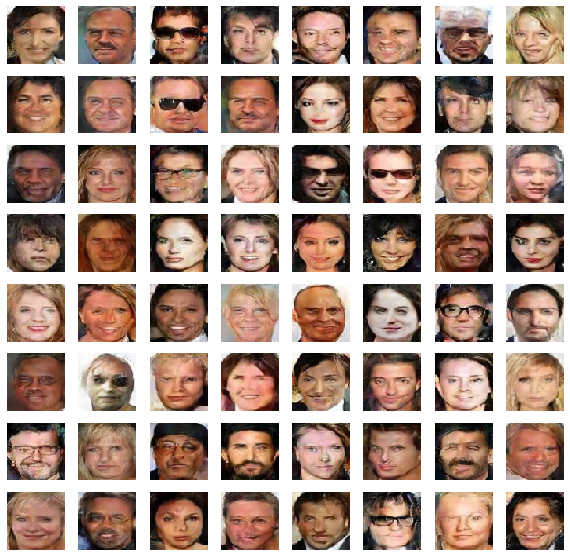

In [14]:
# Generate images
X = model.predict(data['Latent_points'])
# Scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# Plot images
print(X.shape)
plot_generated(X,8)

In [15]:
def find_N_min(array,n,idx_arr):
    minV = np.argpartition(array,n)[:n]
    minV.sort()
    index = idx_arr[minV]
    print('Min values index', index)
    return index

In [16]:
def find_N_max(array,n,idx_arr):
    maxV = np.argpartition(array,-n)[-n:]
    maxV.sort()
    index = idx_arr[maxV]
    print('Max values index', index)
    return index

In [17]:
def find_index_1Class(className,Pmin,Pmax,numIndexZeroClass=10,numIndexOneClass=10):
    '''
    Function that return the indexes(images) of the positive class (1) and negative class (0) 
    that have more probability in a binary classification
    Input:
    - className: Name of the class that we want
    - Pmin: Tolerance of the probability of the class 0
    - Pmax: Tolerance of the probability of the class 1
    - numIndexOneClass: Numer of indexes we want to get of the class One
    - numIndexZeroClass: Numer of indexes we want to get of the class Zero
    Output: Two list that contain the indexes of the images that have more probability to belong
    to the class zero and the class 1
    '''
    ix = np.where(dfClass[className]<Pmin)[0]
    zero_ix = find_N_min(np.array(dfClass[className][ix]),numIndexZeroClass,ix)
    ix = np.where(dfClass[className]>Pmax)[0]
    one_ix = find_N_max(np.array(dfClass[className][ix]),numIndexOneClass,ix)
    return (zero_ix, one_ix)

Mean latent vectors of each face attribute

In [69]:
# Get the index of elements 
(woman_ix, man_ix) = find_index_1Class('Male',0.1,0.9) # Male
(old_ix, young_ix) = find_index_1Class('Young',0.15,0.9,7,10) # Young
(noglass_ix, glass_ix) = find_index_1Class('Eyeglasses',0.1,0.9,10,7) # Eyeglasses
(nomustache_ix, mustache_ix) = find_index_1Class('Mustache',0.1,0.9,10,3) # Mustache
(_, bald_ix) = find_index_1Class('Bald',0.1,0.80,10,3) # Blond_Hair
(_, brown_hair_ix) = find_index_1Class('Brown_Hair',0.1,0.90,10,10) # Blond_Hair
(_, black_hair_ix) = find_index_1Class('Black_Hair',0.1,0.90,10,10) # Blond_Hair
(_, blond_hair_ix) = find_index_1Class('Blond_Hair',0.1,0.90,10,5) # Blond_Hair
(_, gray_hair_ix) = find_index_1Class('Gray_Hair',0.1,0.80,10,3) # Blond_Hair

Min values index [12 13 17 26 28 32 47 56 58 64]
Max values index [ 1  6  9 11 20 48 51 54 66 70]
Min values index [ 1  9 11 36 40 66 70]
Max values index [ 0 12 28 31 39 45 47 53 58 65]
Min values index [12 27 31 45 46 52 53 58 63 65]
Max values index [ 2 10 18 21 38 61 67]
Min values index [12 17 26 28 31 37 56 58 63 65]
Max values index [ 1 54 70]
Min values index [ 8 12 13 17 27 31 32 43 53 69]
Max values index [36 68 70]
Min values index [ 1  6  7 29 35 36 51 54 56 70]
Max values index [12 13 21 25 27 30 43 52 53 69]
Min values index [17 32 35 43 47 49 56 64 69 70]
Max values index [ 8 26 29 31 34 50 51 54 58 63]
Min values index [ 4 20 29 31 39 44 50 51 54 63]
Max values index [ 7 47 49 56 64]
Min values index [12 13 26 29 31 43 51 53 63 69]
Max values index [ 6 14 40]


In [74]:
woman = average_points(data['Latent_points'],woman_ix)
man = average_points(data['Latent_points'],man_ix)
young = average_points(data['Latent_points'],young_ix)
old = average_points(data['Latent_points'],old_ix)
glass = average_points(data['Latent_points'],glass_ix)
noglass = average_points(data['Latent_points'],noglass_ix)
mustache = average_points(data['Latent_points'],mustache_ix)
nomustache = average_points(data['Latent_points'],nomustache_ix)
bald = average_points(data['Latent_points'],bald_ix)
brown_hair = average_points(data['Latent_points'],brown_hair_ix)
black_hair = average_points(data['Latent_points'],black_hair_ix)
blond_hair = average_points(data['Latent_points'],blond_hair_ix)
gray_hair = average_points(data['Latent_points'],gray_hair_ix)

In [75]:
all_vectors = np.vstack((woman, man, young, old, glass, noglass, mustache, nomustache,bald,brown_hair,black_hair,blond_hair,gray_hair))
namesclas = ['Woman','Man','Young','Old','Eyeglasses','No eyeglasses','Mustache','No mustache','Bald','Brown_Hair','Black_Hair','Blond_Hair','Gray_Hair']
#all_vectors = np.vstack((woman, man, young, old, glass, noglass, mustache, nomustache, hair_blond, nohair_blond))
#namesclas = ['Woman','Man','Young','Old','Eyeglasses','No eyeglasses','Mustache','No mustache','Blond Hair','No blond hair']

IndexError: index 13 is out of bounds for axis 0 with size 13

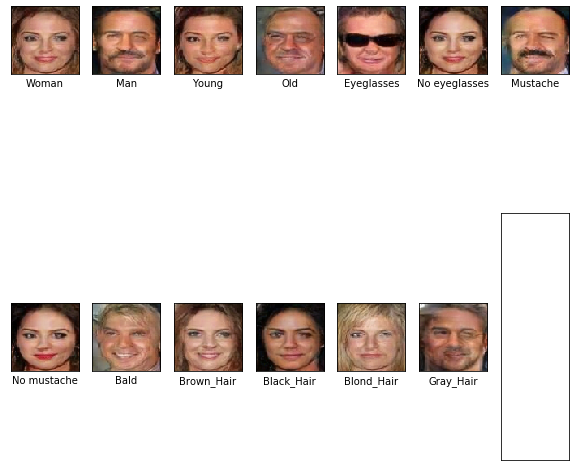

In [78]:
plot_mean_latent_points(all_vectors,model,namesclas)

Vector latent operations

In [84]:
delta = 1.5

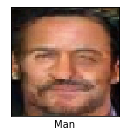

In [85]:
m = all_vectors[1]
plot_single_latent_point(m,model,'Man')

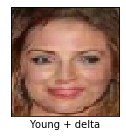

In [93]:
w = all_vectors[0]
plot_single_latent_point(w,model,'Young + delta')

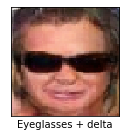

In [88]:
e = all_vectors[4]
plot_single_latent_point(e,model,'Eyeglasses + delta')

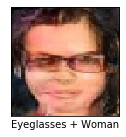

In [89]:
ew  =  w + e
result_vector = np.expand_dims(ew, 0)
plot_single_latent_point(result_vector,model,'Eyeglasses + Woman')

Generate images with specific face attributes

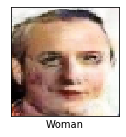

In [125]:
plot_gaussian_single_point(all_vectors[11],model,'Woman')

In [128]:
plot_gaussian_points(all_vectors[13],model,'Woman',5)

IndexError: index 13 is out of bounds for axis 0 with size 13